<a href="https://colab.research.google.com/github/SPThole/Miscellaneous-curious/blob/main/shap_on_dask_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost==1.3.3
!python -m pip install dask[dataframe] --upgrade
!pip install dask-xgboost
!pip install dask_ml
!pip install shap

  Using cached https://files.pythonhosted.org/packages/2e/57/bf5026701c384decd2b995eb39d86587a103ba4eb26f8a9b1811db0896d3/xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl
ERROR: dask-xgboost 0.1.11 has requirement xgboost<=0.90, but you'll have xgboost 1.3.3 which is incompatible.
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Requirement already up-to-date: dask[dataframe] in /usr/local/lib/python3.6/dist-packages (2021.1.1)
  Using cached https://files.pythonhosted.org/packages/c1/24/5fe7237b2eca13ee0cfb100bec8c23f4e69ce9df852a64b0493d49dae4e0/xgboost-0.90-py2.py3-none-manylinux1_x86_64.whl
  Found existing installation: xgboost 1.3.3
    Uninstalling xgboost-1.3.3:
      Successfully uninstalled xgboost-1.3.3
     |████████████████████████████████| 358kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489394 sha256=407ac5bbafaacd9ecee6468d9f3fe4d9f274b586ecdc64c276da33ee77

In [1]:
from dask.distributed import Client

client = Client(n_workers=4, threads_per_worker=1)
client

Client Scheduler: tcp://127.0.0.1:42213 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 13.65 GB


In [22]:
from dask_ml.datasets import make_classification

X, y = make_classification(n_samples=1e6, n_features=20,
                           chunks=1000, n_informative=4,
                           random_state=0)
X

dask.array<normal, shape=(1000000, 20), dtype=float64, chunksize=(1000, 20), chunktype=numpy.ndarray>

In [23]:
from dask_ml.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [24]:
import dask
import xgboost
import dask_xgboost

In [25]:
params = {'objective': 'binary:logistic',
          'max_depth': 4, 'eta': 0.01, 'subsample': 0.5,
          'min_child_weight': 0.5}

bst = dask_xgboost.train(client, params, X_train, y_train, num_boost_round=10)

In [26]:
bst

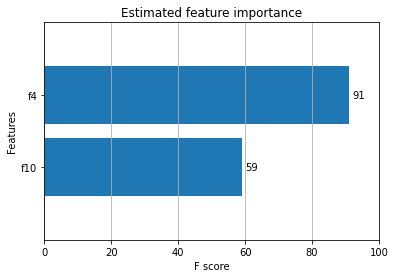

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = xgboost.plot_importance(bst, height=0.8, max_num_features=9)
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()

In [28]:
import shap

In [ ]:
%timeit
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, max_display=20)

Slicing with an out-of-order index is generating 1000 times more chunks


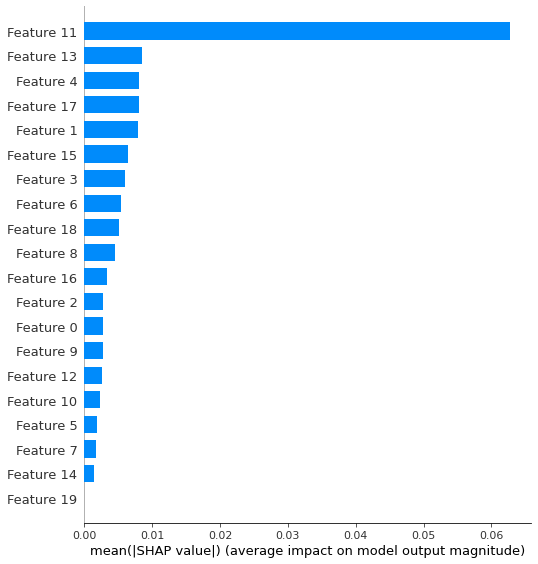

In [10]:
shap.summary_plot(shap_values, X, max_display=20, plot_type='bar')

In [12]:
import xgboost as xgb
import numpy as np

X1 = np.random.normal(0,1,(100,10))
y1 = np.random.normal(0,1,(100,1))

model = xgb.XGBRegressor()

model.fit(X1,y1)

[13:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [21]:
xgb.Booster

xgboost.core.Booster